#### Figure S8A in M&S (2020) AS&T
The figure is in the SI.

Out of the three processes through which the targetted after-sieve dust (sampled by a high-suction vacuum sampler) was recovered, transfer from the sampler after-sieve parts (e.g., HEPA sock and the internal sampler channel walls) led to minimum loss of dust (the transfer process has the highest efficiency; see the orange boxes). The suction process often extracted minimal mass relative to what existing filter (see green boxes). Some fraction of dust was also trapped by the sieve (assuming not targetted due to being nominally > 1000 µm). In the end, the multiplication of the three processes which yielded the recovery efficiency left a small number meaning from HVAC filters only a small percentage can be recovered if with a single extraction cycle.

Plot type: Box plots

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_excel(r'artl_dataset_summary.xlsx'))
df = df[df['Cycle_N'] < 3]

# defining positions for x-axis
pos_list_1 = [1,2,3,4]
pos_list_2 = [6,7,8,9]

for c in [1,2]:
    for var in ['E', 'C', 'D', 'CE']:
        locals()['df_%s_%s' %(c,var)] = df[(df['Cycle_N'] == c)][var].dropna()

medianprops = dict(linestyle = '-', linewidth = 0.5, color = 'black')

In [2]:
df.head()

,ExpN,Cycle_N,ft,td,M_filter_post,M_filter_change,M_filter_change_cum,M_d,M_d_cum,M_s,...,Mass_C,M_t,M_t_cum,sCE,sCE_cum,tCE,tCE_cum,d_t_rat,d_t_rat_cum,lat
0,1,1,3,2,272.921,2.133,2.133,1.38413,1.38413,0.28598,...,NaN,1.67011,1.67011,1.928518,1.928518,11.262459,11.262459,0.828766,0.828766,1
1,2,1,3,2,288.762,1.526,1.526,0.60291,0.60291,0.09923,...,1.50926,0.70214,0.70214,2.788926,2.788926,19.734120,19.734120,0.858675,0.858675,4
2,2,2,3,2,288.246,0.516,2.042,0.19414,0.79705,0.01518,...,0.24995,0.20932,0.91146,0.426644,3.215571,5.883080,25.617201,0.927479,0.874476,4
3,3,1,3,1,286.370,1.306,1.306,0.52961,0.52961,0.00043,...,0.60903,0.53004,0.53004,0.013154,0.013154,16.214133,16.214133,0.999189,0.999189,4
4,3,2,3,1,286.220,0.150,1.456,0.06705,0.59666,-0.00059,...,0.09228,0.06646,0.59650,-0.018048,-0.004894,2.033038,18.247170,1.008878,1.000268,4


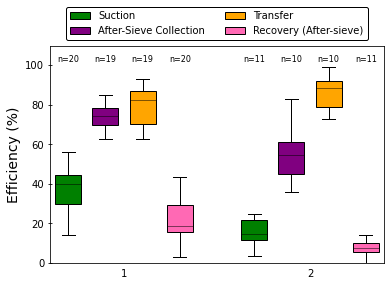

In [3]:
fig, ax = plt.subplots()

box1 = plt.boxplot([df_1_E, df_1_C, df_1_D, df_1_CE], positions = pos_list_1,  widths = 0.7, showfliers = False, patch_artist = True, medianprops = medianprops)
box2 = plt.boxplot([df_2_E, df_2_C, df_2_D, df_2_CE], positions = pos_list_2,  widths = 0.7, showfliers = False, patch_artist = True, medianprops = medianprops)

colors = ['g', 'purple', 'orange', 'hotpink']


for bplot in (box1, box2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.xticks([])

plt.ylim(0.0, 110)
plt.yticks(np.arange(0, 101, step = 20))
plt.ylabel('Efficiency (%)', size = 14)
plt.tick_params(axis = 'y', direction = 'inout')

plt.text(2.5, -7, '1', fontsize = 10, ha = 'center')
plt.text(7.5, -7, '2', fontsize = 10, ha = 'center')


plt.text(1, 102, 'n=20', fontsize = 8, ha = 'center')
plt.text(2, 102, 'n=19', fontsize = 8, ha = 'center')
plt.text(3, 102, 'n=19', fontsize = 8, ha = 'center')
plt.text(4, 102, 'n=20', fontsize = 8, ha = 'center')

plt.text(6, 102, 'n=11', fontsize = 8, ha = 'center')
plt.text(7, 102, 'n=10', fontsize = 8, ha = 'center')
plt.text(8, 102, 'n=10', fontsize = 8, ha = 'center')
plt.text(9, 102, 'n=11', fontsize = 8, ha = 'center')

ax.legend(box1['boxes'], ['Suction', 'After-Sieve Collection', 'Transfer', 'Recovery (After-sieve)'], 
          ncol =2, loc='upper center', bbox_to_anchor=(0.5, 1.20),  frameon = True, edgecolor = 'black', framealpha=1)

plt.savefig(r'FigureS8a.jpg', format='jpg', dpi=1600, bbox_inches='tight')

End of code